=== Logistic Regression Results ===
Accuracy: 0.8222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



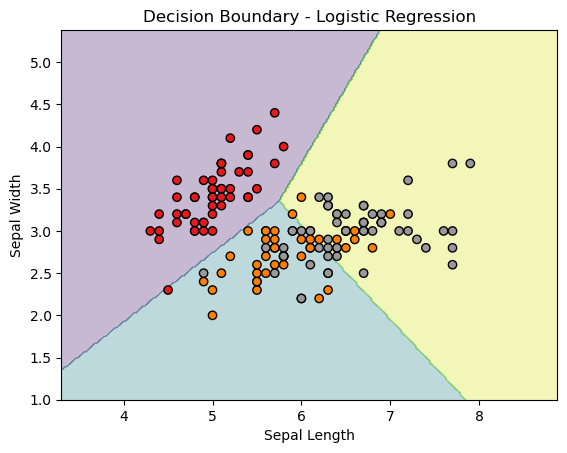

In [7]:
# logistic_regression.py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = load_iris()
X = iris.data[:, :2]   # Only take first two features for plotting
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Logistic Regression model
model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Results
print("=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Plot decision boundary ---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.title("Decision Boundary - Logistic Regression")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


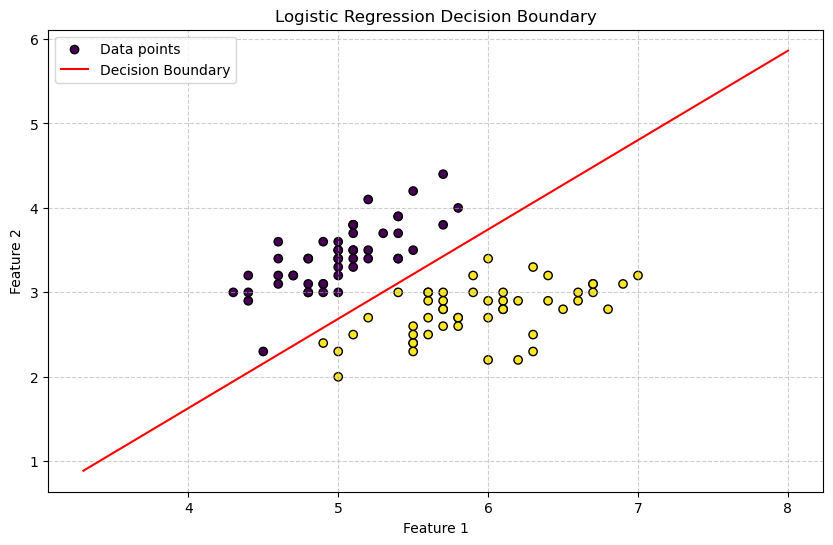

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# --- Assumes you have already run the "From Scratch" code ---
# And have the following variables in your environment:
# X: The full feature set
# y: The full target labels
# model: The trained LogisticRegression instance

def plot_decision_boundary(X, y, model):
    """
    Plots the data points and the decision boundary of a trained logistic regression model.
    """
    # Create a scatter plot of the data points, colored by class
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', label='Data points')

    # Calculate the decision boundary line
    # Create a range of x-values that span the plot
    plot_x = np.array([min(X[:, 0]) - 1, max(X[:, 0]) + 1])
    
    # Retrieve weights and bias from the trained model (scikit-learn)
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # Calculate the corresponding y-values for the decision boundary line
    # From w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1*x1 + b) / w2
    plot_y = -(w[0] * plot_x + b) / w[1]

    # Plot the decision boundary
    plt.plot(plot_x, plot_y, 'r-', label='Decision Boundary')

    # Add labels and title for clarity
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Call the function to plot the model
plot_decision_boundary(X, y, model)

=== Multinomial Naive Bayes (Binary) ===
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



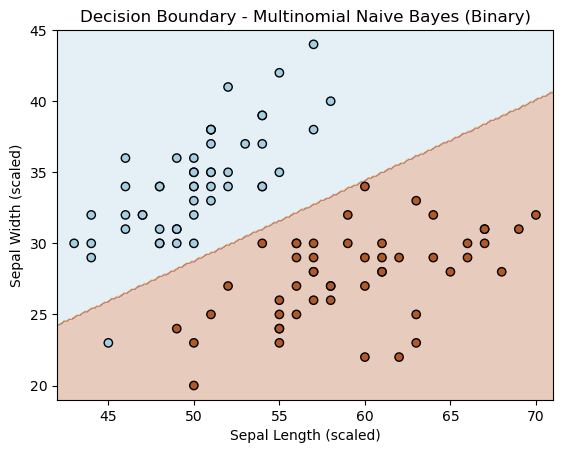

In [9]:
# multinomial_nb_binary.py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = load_iris()
X = iris.data[:, :2]   # First 2 features
y = iris.target

# Use only 2 classes: setosa (0) and versicolor (1)
X = X[y < 2]
y = y[y < 2]

# Scale to non-negative integers (for MultinomialNB)
X = np.abs(X * 10).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("=== Multinomial Naive Bayes (Binary) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Plot decision boundary ---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Decision Boundary - Multinomial Naive Bayes (Binary)")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.show()
